[*********************100%***********************]  1 of 1 completed


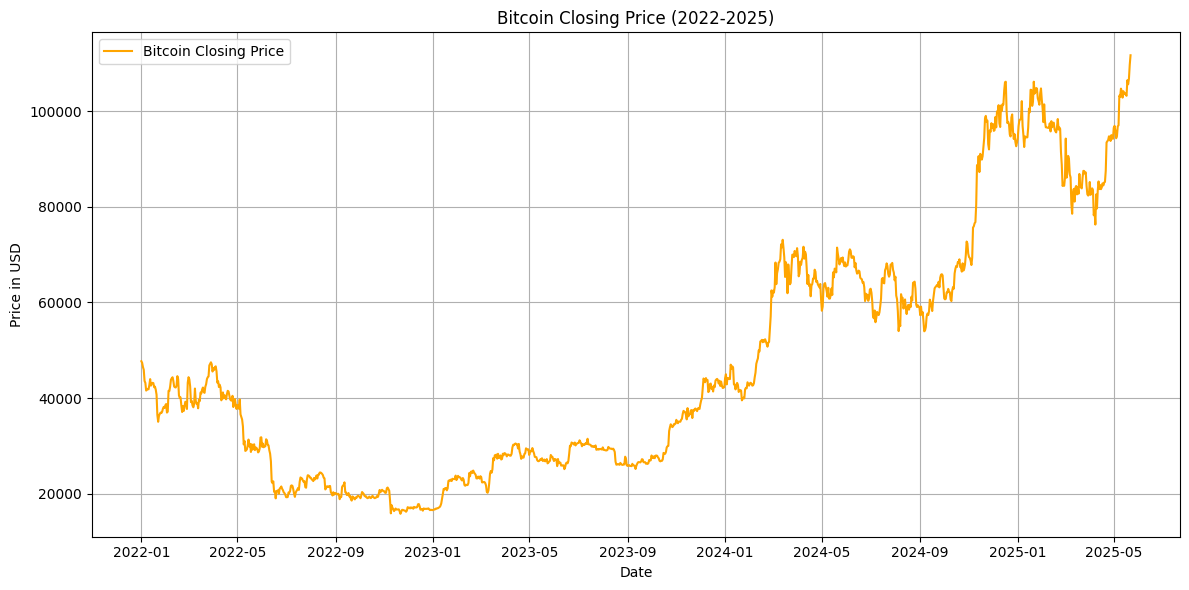

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:839: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


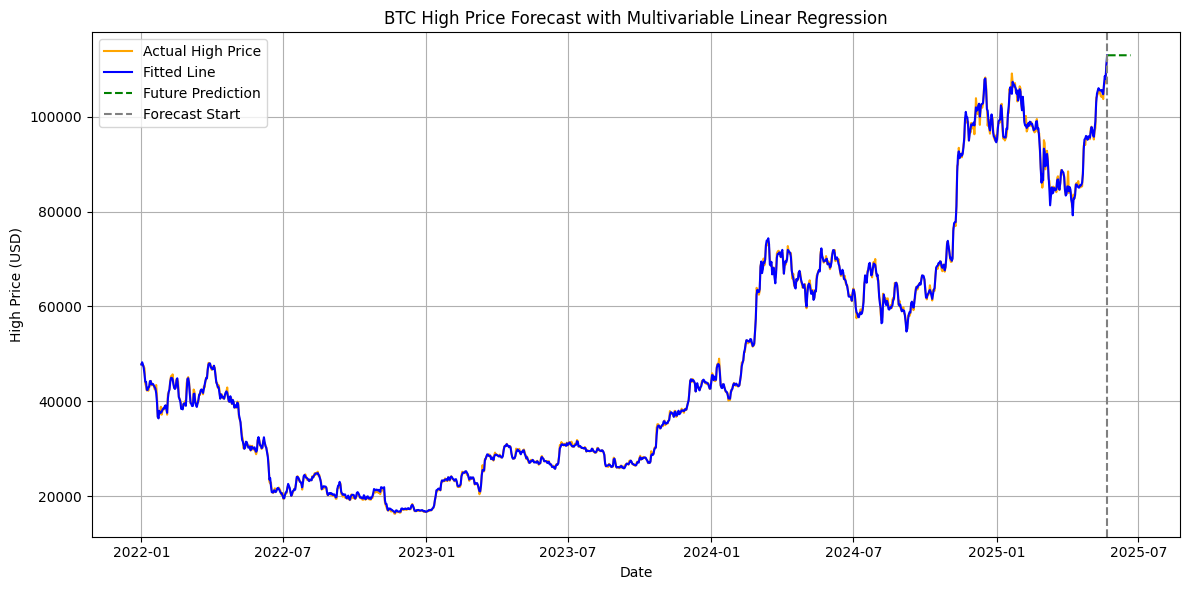

In [18]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

os.makedirs("data", exist_ok=True)
btc = yf.download("BTC-USD", start = "2022-01-01", end = "2025-05-23")


btc["Return"] = btc["Close"].pct_change()
btc["MA_5"] = btc["Close"].rolling(window=5).mean()
btc["MA_30"] = btc["Close"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(btc["Close"], label = "Bitcoin Closing Price", color = "orange")
plt.title("Bitcoin Closing Price (2022-2025)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

btc = yf.download("BTC-USD", start="2022-01-01", end="2025-05-23")
btc = btc[["Open", "Close", "Low", "High", "Volume"]].dropna()

btc = btc.reset_index()
btc["Date_ordinal"] = btc["Date"].map(pd.Timestamp.toordinal)
features = ["Open", "Close", "Low", "Volume", "Date_ordinal"]
X = btc[features]
y = btc["High"]
model = LinearRegression()
model.fit(X, y)

last_row = btc.iloc[-1]
future_dates = pd.date_range(start=btc["Date"].max() + pd.Timedelta(days=1), periods=30)

future_df = pd.DataFrame({
    "Date": future_dates,
    "Open": [last_row["Open"]] * 30,
    "Close": [last_row["Close"]] * 30,
    "Low": [last_row["Low"]] * 30,
    "Volume": [last_row["Volume"]] * 30,
    "Date_ordinal": [d.toordinal() for d in future_dates]
})


future_pred = model.predict(future_df[features])

plt.figure(figsize=(12, 6))
plt.plot(btc["Date"], y, label="Actual High Price", color="orange")
plt.plot(btc["Date"], model.predict(X), label="Fitted Line", color="blue")
plt.plot(future_dates, future_pred, label="Future Prediction", color="green", linestyle="--")
plt.axvline(x=last_date, color="gray", linestyle="--", label="Forecast Start")
plt.title("BTC High Price Forecast with Multivariable Linear Regression")
plt.xlabel("Date")
plt.ylabel("High Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
